In [65]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans    ##  K-means 임포트
from sklearn.metrics import silhouette_score
import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.formula.api as smf
from dateutil.relativedelta import relativedelta
# import setuptools.dist
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

## 데이터 불러오기

In [45]:
df = pd.read_csv('../../data/Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 나이 분포 확인 (distplot)

Text(0.5, 1.0, 'Distplot of Age')

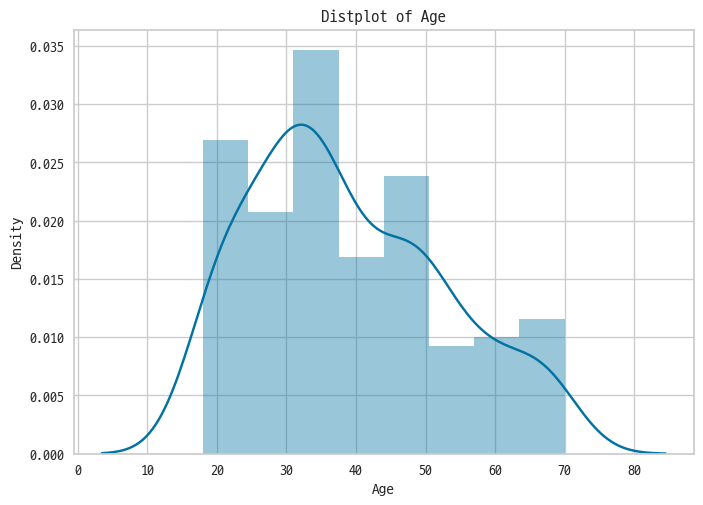

In [47]:
sns.distplot(df['Age'])
plt.title('Distplot of Age')

## 연간 소득 분포 확인 (distplot)

Text(0.5, 1.0, 'Distplot of Annual Income (k$)')

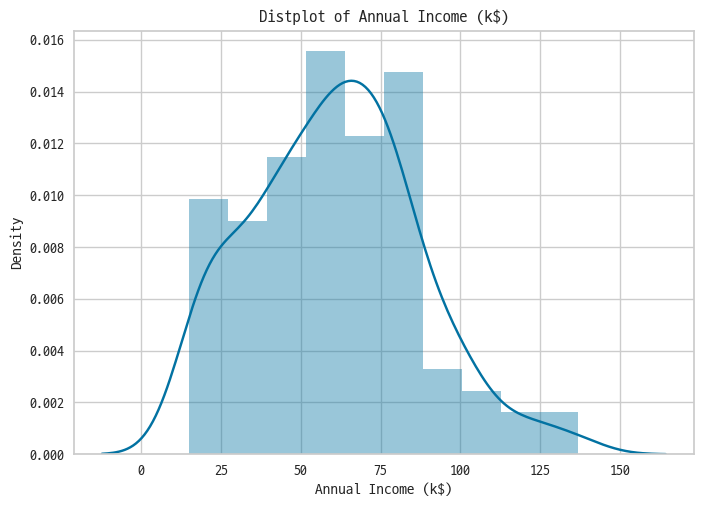

In [48]:
sns.distplot(df['Annual Income (k$)'])
plt.title('Distplot of Annual Income (k$)')

## 쇼핑 점수 분포 확인 (distplot)

Text(0.5, 1.0, 'Spending Score (1-100)')

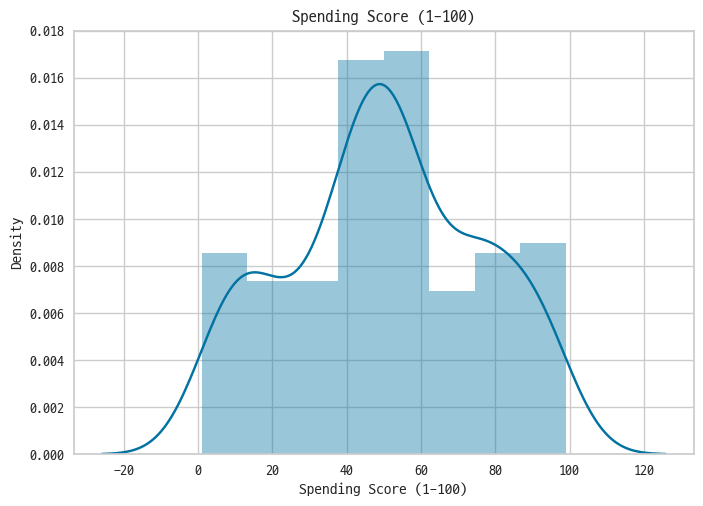

In [49]:
sns.distplot(df['Spending Score (1-100)'])
plt.title('Spending Score (1-100)')

## 성별 인원수 계산

In [50]:
df.groupby('Gender').count()[['CustomerID']]

,CustomerID
Gender,
Female,112
Male,88


## 성별 인원수 그래프(countplot)

<Axes: xlabel='Gender', ylabel='count'>

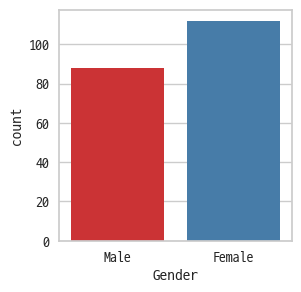

In [51]:
plt.figure(1 , figsize = (3 , 3))
sns.countplot(x = 'Gender' , data = df, palette='Set1')

## 성별, 나이와 연소득 분포(scatter)

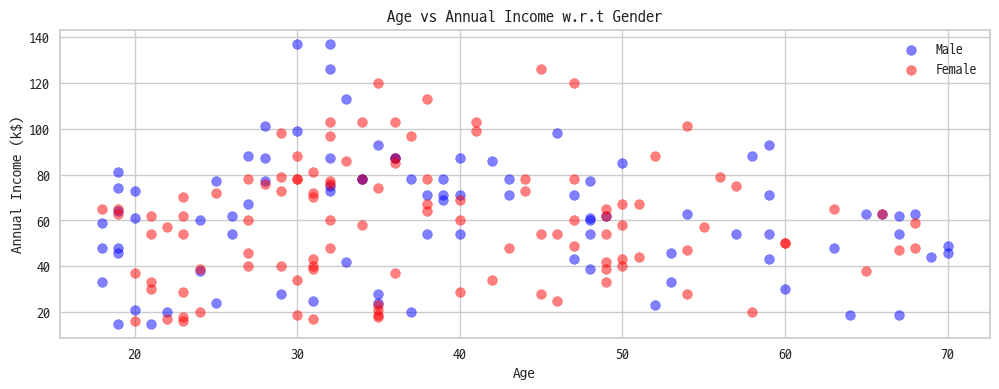

In [52]:
plt.figure(1 , figsize = (12 , 4))
plt.grid(True)

colors = {'Male': 'blue', 'Female': 'red'}

for gender in ['Male', "Female"]:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , 
                data = df[df['Gender'] == gender] ,
                s = 50 , alpha = 0.5 , label = gender, color=colors[gender])

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')   
plt.legend() 
plt.show()

## 성별 기준으로 나이와 연소득 평균

In [53]:
df.groupby('Gender').mean()[['Age','Annual Income (k$)']].sort_values(by='Gender', ascending=False)

,Age,Annual Income (k$)
Gender,,
Male,39.806818,62.227273
Female,38.098214,59.250000


## 성별 쇼핑점수 분포 (violinplot 와 swarmplot)

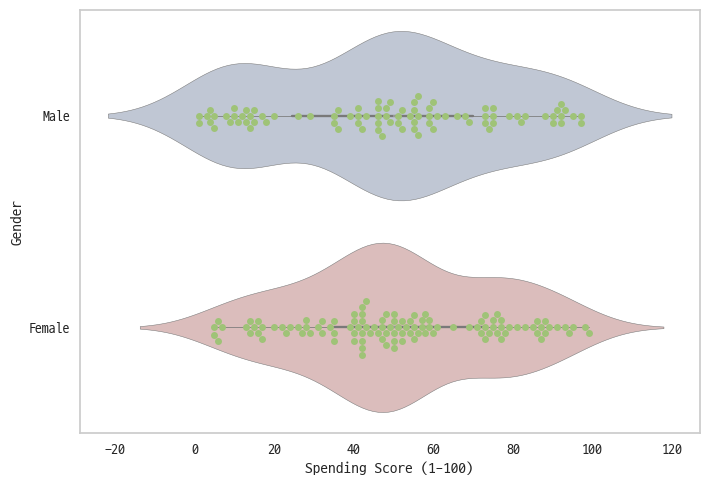

In [54]:
sns.violinplot(x = 'Spending Score (1-100)' , y = 'Gender' , data = df , palette = 'vlag')
sns.swarmplot(x = 'Spending Score (1-100)' , y = 'Gender' , data = df)
plt.ylabel('Gender')
plt.grid(False)
plt.show()

## 나이와 쇼핑점수 항목으로 군집분석

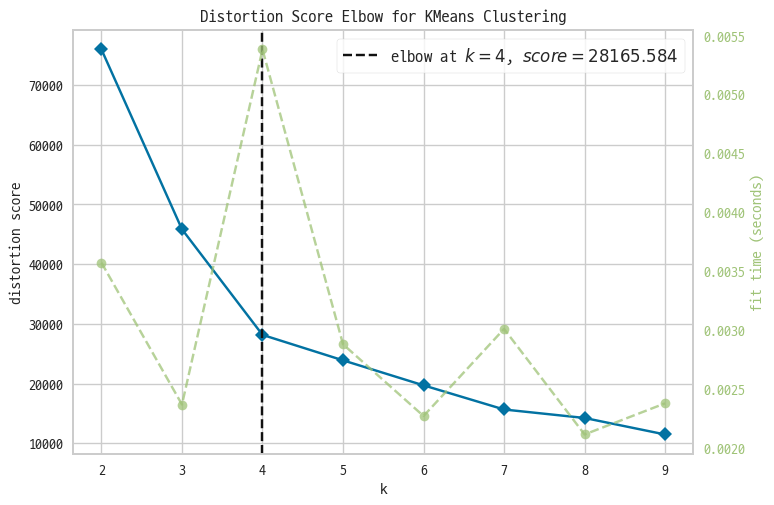

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
data = df[['Age', 'Spending Score (1-100)']].values

visualizer = KElbowVisualizer(KMeans(), k=(2, 10))
visualizer.fit(data)
visualizer.show()

In [56]:
a = KMeans(n_clusters=4, random_state=32)
a.fit(data)
df['labels1'] = a.labels_
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels1
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3


In [57]:
## 0번 그룹 고객
copy_df = df[df['labels1']==0]
copy_df[['Age','Spending Score (1-100)']].describe()

,Age,Spending Score (1-100)
count,57.000000,57.000000
mean,30.175439,82.350877
std,5.535995,8.913255
min,18.000000,68.000000
25%,27.000000,75.000000
50%,30.000000,81.000000
75%,35.000000,90.000000
max,40.000000,99.000000


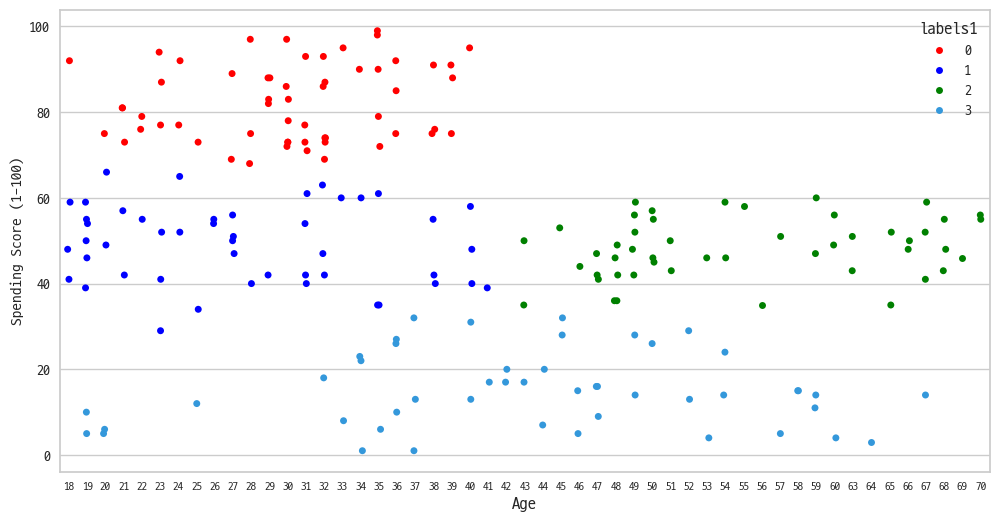

In [58]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Age', y='Spending Score (1-100)', data=df, hue='labels1', 
                 palette= {0: 'red', 1: 'blue', 2: 'green', 3: '#3498db'})
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=8)
plt.show()

## 세 개의 항목(나이, 연소득, 쇼핑점수)으로 군집분석

In [59]:
data2= df[['Age' , 'Annual Income (k$)','Spending Score (1-100)']].values

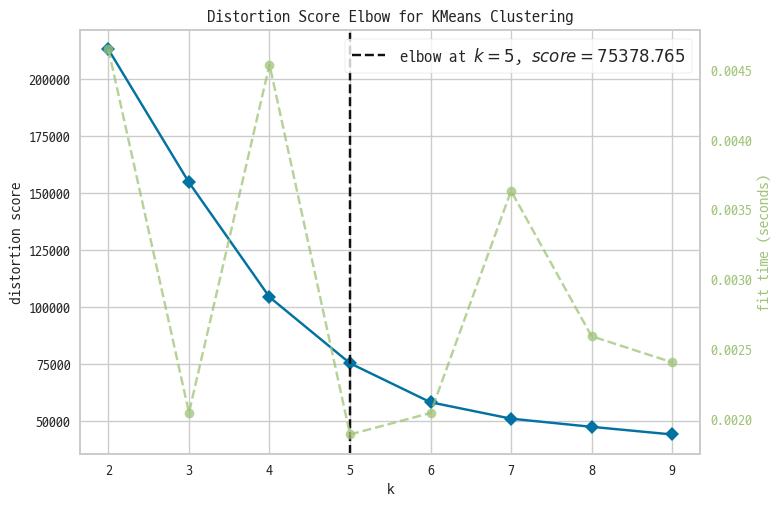

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
visualizer2 = KElbowVisualizer(KMeans(), k=(2,10))

visualizer2.fit(data2) 
visualizer2.show()

In [61]:
a2 = KMeans(n_clusters=5, random_state=32)
a2.fit(data2)
df['labels2'] = a2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels1,labels2
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,1,1


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

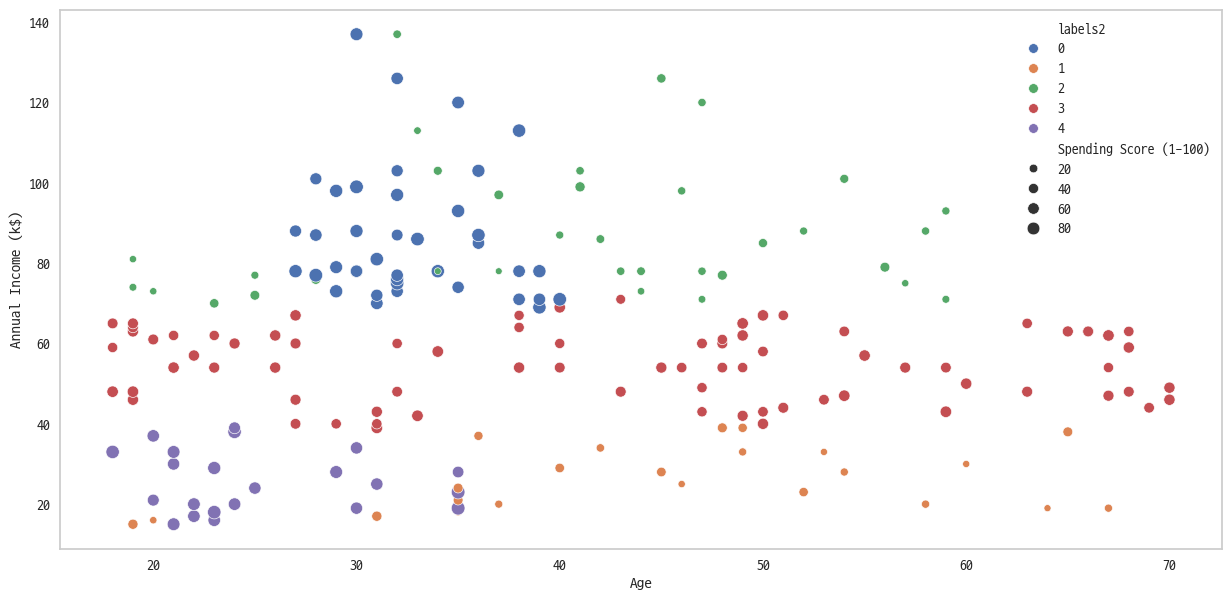

In [62]:
plt.figure(figsize = (15 , 7) )
plt.grid(False)
sns.scatterplot(x='Age',y='Annual Income (k$)',
                hue='labels2',
                size='Spending Score (1-100)',
                data=df,palette='deep')

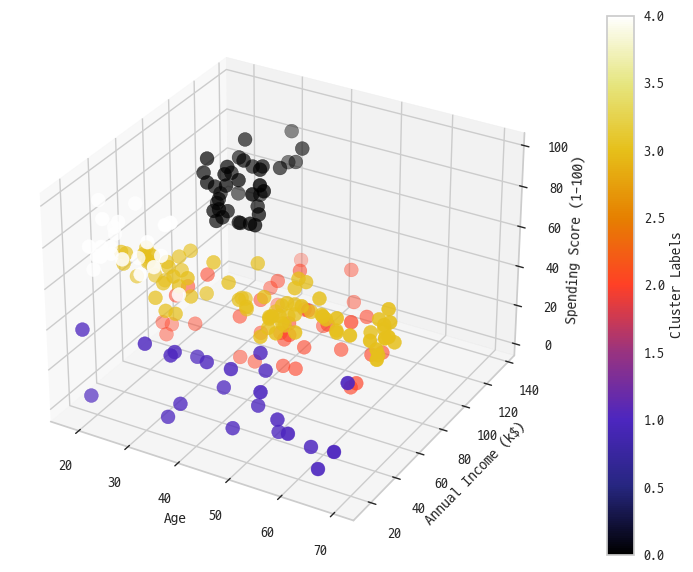

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], 
                     df['Annual Income (k$)'], 
                     df['Spending Score (1-100)'], 
                     c=df['labels2'],    # 색상은 'labels2'에 따라 다르게
                     s=100 ,             # 사이즈
                     cmap='CMRmap')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels')